In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uppar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Specify the folder path where your datasets are located
folder_path = 'recruitment_data'  # Update this to the folder where the datasets are located

# List all Excel files in the folder
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]

In [6]:
# Loop through each file and print only the column names
for file in files:
    df = pd.read_excel(folder_path + '/' + file)
    print(f"Columns in {file}:")
    print([col for col in df.columns])  # Ensure the output only contains column names
    print()  # Add a blank line for better readability

Columns in dataset4.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset5.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset6.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset7.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset8.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset9.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']

Columns in dataset_1_2_3_combined.xlsx:
['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description']



In [7]:
# Code for Merging all the datasets and creating the full dataset for traing and testing
dataframes = []

for file in files:
    file_path = os.path.join(folder_path, file)
    combined_df = pd.read_excel(file_path)
    dataframes.append(combined_df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)



# Loading and Inspecting Datasets
Point: Specify the folder path where datasets are located and list all Excel files.
Code reads all .xlsx files in the given folder path and lists the column names of each dataset for inspection.
Point: Merge all datasets into a single DataFrame for analysis.
Combines individual dataframes into one comprehensive dataset for training and testing.



In [10]:
# Save the combined dataframe to a CSV file
combined_df.to_csv('combined_dataset.csv', index=False)
print("Combined dataframe saved to 'combined_dataset.csv'.")

Combined dataframe saved to 'combined_dataset.csv'.


In [11]:
combined_df.shape

(3174, 8)

In [13]:
combined_df.head()

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,rejected,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a selected can...",selected,Growth mindset and adaptability.,Here is a job description for a Software Engin...
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",rejected,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",selected,Strong cultural fit.,Here is a sample job description for a Softwar...
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,rejected,Lack of relevant skills or experience.,Here is a sample job description for a Data En...


In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   3174 non-null   object
 1   Name                 3174 non-null   object
 2   Role                 3174 non-null   object
 3   Transcript           3174 non-null   object
 4   Resume               3174 non-null   object
 5   decision             3174 non-null   object
 6   Reason for decision  3174 non-null   object
 7   Job Description      3174 non-null   object
dtypes: object(8)
memory usage: 198.5+ KB


In [19]:
# # Drop the last two columns: 'Unnamed: 0' and 'num_words_in_transcript'
# columns_to_drop = ['Unnamed: 0', 'num_words_in_transcript']
# combined_df = combined_df.drop(columns=columns_to_drop, errors='ignore')

In [21]:
# Function to clean text columns
def clean_text_column(column):
    """
    Cleans a text column by:
    1. Removing all non-alphabetic characters.
    2. Removing extra spaces.
    3. Converting text to lowercase.
    """
    if column.dtype == 'object':  # Only apply to text columns
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

# Clean specific text columns
columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Display cleaned data for verification
print("Cleaned Data Sample:")
combined_df.head()


Cleaned Data Sample:


,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,uppaup1,Alice Smith,Software Engineer,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,rejected,unsatisfactory references or background check,here is a comprehensive job description for a ...
1,uppaup2,Hank Brown,Software Engineer,heres a simulated interview for a software eng...,heres a resume for hank brown a selected candi...,selected,growth mindset and adaptability,here is a job description for a software engin...
2,uppaup3,Bob Jones,Data Scientist,heres a simulated interview for a data scienti...,heres a sample resume for bob jones who applie...,rejected,inadequate communication or interpersonal skills,here is a comprehensive job description for a ...
3,uppaup4,Bob Miller,Software Engineer,heres a simulated interview for a software eng...,heres a sample resume for bob miller a softwar...,selected,strong cultural fit,here is a sample job description for a softwar...
4,uppaup5,Ivy Jones,Data Engineer,heres a simulated interview for a data enginee...,heres a sample resume for ivy jones\n\nivy jon...,rejected,lack of relevant skills or experience,here is a sample job description for a data en...


# Data Overview and Cleaning 
Point: Display shape, column information, and preview the combined dataset.

Provides basic information (shape, head, info) for an overview of the dataset's structure and size.
Point: Clean text columns by removing special characters, trimming whitespace, and converting text to lowercase.

Applies cleaning functions to specified text-based columns like 'Transcript', 'Resume', 'Job Description', and 'Reason for decision' to standardize data.
Point: Handle decision column and unify labels ('select' and 'selected').

Maps variations of decision outcomes into standardized labels ('select', 'reject') for consistency.

In [24]:
combined_df['decision'].unique()

array(['rejected', 'selected', 'reject', 'select', 'Select', 'Reject'],
      dtype=object)

In [26]:
def process_decision(text):
    if text in ['select','selected']:
        return 'select'
    else :
        return 'reject'

In [28]:
combined_df['Role'].unique()

array(['Software Engineer', 'Data Scientist', 'Data Engineer',
       'UI Engineer', 'Product Manager', 'Data Analyst', 'UI Designer',
       'Digital Marketing Specialist', 'Cybersecurity Specialist',
       'HR Specialist', 'Network Engineer', 'Graphic Designer',
       'Game Developer', 'Mobile App Developer', 'Cloud Architect',
       'Business Analyst', 'Database Administrator', 'DevOps Engineer',
       'Machine Learning Engineer', 'Content Writer',
       'System Administrator', 'UI/UX Designer', 'AI Engineer',
       'Project Manager', 'Software Developer', 'product manager',
       'software engineer', 'data engineer', 'ui engineer',
       'data scientist', 'data analyst', 'ui designer'], dtype=object)

In [30]:
unique_count = combined_df.groupby('Role')['ID'].count()
unique_count

Role
AI Engineer                      13
Business Analyst                 11
Cloud Architect                   8
Content Writer                    5
Cybersecurity Specialist          9
Data Analyst                     78
Data Engineer                   192
Data Scientist                  292
Database Administrator            9
DevOps Engineer                  16
Digital Marketing Specialist     14
Game Developer                   10
Graphic Designer                 15
HR Specialist                    12
Machine Learning Engineer        13
Mobile App Developer              7
Network Engineer                 16
Product Manager                 203
Project Manager                  56
Software Developer               66
Software Engineer               225
System Administrator              5
UI Designer                      71
UI Engineer                     147
UI/UX Designer                    7
data analyst                    183
data engineer                   307
data scientist         

In [32]:
# Generate summary insights
insights = {}

# Total Candidates
insights['Total Candidates'] = len(combined_df)

# Selected and Rejected Candidates
if 'decision' in combined_df.columns:
    decision_counts = combined_df['decision'].str.strip().value_counts()
    insights['Select Candidates'] = decision_counts.get('select', 0)
    insights['Reject Candidates'] = decision_counts.get('reject', 0)
    insights['Selected Candidates'] = decision_counts.get('selected', 0)
    insights['Rejected Candidates'] = decision_counts.get('rejected', 0)
else:
    insights['Selected Candidates'] = "Column 'Decision' not found"
    insights['Rejected Candidates'] = "Column 'Decision' not found"

# Most Common Reason for Decision
if 'Reason for decision' in combined_df.columns:
    insights['Most Common Reason for Decision'] = combined_df['Reason for decision'].mode()[0]
else:
    insights['Most Common Reason for Decision'] = "Column 'Reason for decision' not found"

# Print insights
print("Insights:")
for key, value in insights.items():
    print(f"{key}: {value}")


Insights:
Total Candidates: 3174
Select Candidates: 904
Reject Candidates: 970
Selected Candidates: 558
Rejected Candidates: 542
Most Common Reason for Decision: technical knowledge


In [34]:
# Check for null values
print("Null values in combined dataset:")
print(combined_df.isnull().sum())


Null values in combined dataset:
ID                     0
Name                   0
Role                   0
Transcript             0
Resume                 0
decision               0
Reason for decision    0
Job Description        0
dtype: int64


In [36]:
# Basic statistics for numeric columns
print("Basic statistics for numeric columns:")
combined_df.describe()


Basic statistics for numeric columns:


,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
count,3174,3174,3174,3174,3174,3174,3174,3174
unique,3174,2021,32,3174,3174,6,508,1624
top,uppaup1,Lucas,data engineer,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,reject,technical knowledge,expectedexperience years domains data analys...
freq,1,21,307,1,1,970,194,78


In [38]:
# Add length columns for Transcript, Resume, and Job Description
combined_df['Transcript_length'] = combined_df['Transcript'].apply(lambda x: len(str(x)))
combined_df['Resume_length'] = combined_df['Resume'].apply(lambda x: len(str(x)))
combined_df['Job_Description_length'] = combined_df['Job Description'].apply(lambda x: len(str(x)))

In [40]:
print(combined_df.columns.tolist())


['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason for decision', 'Job Description', 'Transcript_length', 'Resume_length', 'Job_Description_length']


In [42]:
combined_df.head()

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,Transcript_length,Resume_length,Job_Description_length
0,uppaup1,Alice Smith,Software Engineer,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,rejected,unsatisfactory references or background check,here is a comprehensive job description for a ...,3101,2599,3857
1,uppaup2,Hank Brown,Software Engineer,heres a simulated interview for a software eng...,heres a resume for hank brown a selected candi...,selected,growth mindset and adaptability,here is a job description for a software engin...,4965,2634,1066
2,uppaup3,Bob Jones,Data Scientist,heres a simulated interview for a data scienti...,heres a sample resume for bob jones who applie...,rejected,inadequate communication or interpersonal skills,here is a comprehensive job description for a ...,2803,3050,3105
3,uppaup4,Bob Miller,Software Engineer,heres a simulated interview for a software eng...,heres a sample resume for bob miller a softwar...,selected,strong cultural fit,here is a sample job description for a softwar...,4119,2491,3354
4,uppaup5,Ivy Jones,Data Engineer,heres a simulated interview for a data enginee...,heres a sample resume for ivy jones\n\nivy jon...,rejected,lack of relevant skills or experience,here is a sample job description for a data en...,3321,2864,3843


# Data Analysis and Insights
Point: Generate summary insights, including:
Total candidates, number of selected/rejected candidates, and most common reasons for decisions.
Point: Add text length columns for selected features.
Computes and appends new columns indicating the length of textual data in 'Transcript', 'Resume', and 'Job Description'.

In [45]:
combined_df.groupby(['Role','decision'])['Transcript_length'].mean()

Role               decision
AI Engineer        rejected    3385.800000
                   selected    4045.375000
Business Analyst   rejected    3646.800000
                   selected    4396.000000
Cloud Architect    rejected    3575.500000
                                  ...     
software engineer  select      4312.092857
ui designer        reject      4305.800000
                   select      4592.680000
ui engineer        reject      3456.557377
                   select      3621.915493
Name: Transcript_length, Length: 76, dtype: float64

In [47]:
combined_df.groupby(['Role','decision'])['Transcript_length'].median()

Role               decision
AI Engineer        rejected    3362.0
                   selected    4255.5
Business Analyst   rejected    3434.0
                   selected    4313.5
Cloud Architect    rejected    3762.0
                                ...  
software engineer  select      4262.5
ui designer        reject      4256.5
                   select      4552.0
ui engineer        reject      3278.0
                   select      3382.0
Name: Transcript_length, Length: 76, dtype: float64

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Ensure the necessary columns exist in the dataset
required_columns = ['Transcript', 'Resume', 'Job Description']
for col in required_columns:
    if col not in combined_df.columns:
        raise ValueError(f"Missing required column: {col}")

# Fill missing values with empty strings to avoid errors
for col in required_columns:
    combined_df[col] = combined_df[col].fillna("")

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Define a function to calculate similarity score
def calculate_similarity(text1, text2):
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return similarity

# Calculate scores
combined_df['Transcript_Resume_Score'] = combined_df.apply(
    lambda row: calculate_similarity(row['Transcript'], row['Resume']), axis=1
)
combined_df['Transcript_JobDescription_Score'] = combined_df.apply(
    lambda row: calculate_similarity(row['Transcript'], row['Job Description']), axis=1
)
combined_df['Resume_JobDescription_Score'] = combined_df.apply(
    lambda row: calculate_similarity(row['Resume'], row['Job Description']), axis=1
)

# Calculate the final score as an average of the pairwise scores
combined_df['Final_Match_Score'] = combined_df[
    ['Transcript_Resume_Score', 'Transcript_JobDescription_Score', 'Resume_JobDescription_Score']
].mean(axis=1)

# # Save the dataframe with the scores to a file
# combined_df.to_csv('combined_dataset_with_scores.csv', index=False)
# print("Combined dataset with match scores saved to 'combined_dataset_with_scores.csv'.")

# Display a sample of the data with the calculated scores
combined_df[['Transcript', 'Resume', 'Job Description', 'Transcript_Resume_Score',
                   'Transcript_JobDescription_Score', 'Resume_JobDescription_Score', 'Final_Match_Score']].head()


,Transcript,Resume,Job Description,Transcript_Resume_Score,Transcript_JobDescription_Score,Resume_JobDescription_Score,Final_Match_Score
0,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,here is a comprehensive job description for a ...,0.128843,0.159541,0.267942,0.185442
1,heres a simulated interview for a software eng...,heres a resume for hank brown a selected candi...,here is a job description for a software engin...,0.268331,0.190271,0.268425,0.242342
2,heres a simulated interview for a data scienti...,heres a sample resume for bob jones who applie...,here is a comprehensive job description for a ...,0.311734,0.285505,0.466292,0.354511
3,heres a simulated interview for a software eng...,heres a sample resume for bob miller a softwar...,here is a sample job description for a softwar...,0.226898,0.259491,0.326965,0.271118
4,heres a simulated interview for a data enginee...,heres a sample resume for ivy jones\n\nivy jon...,here is a sample job description for a data en...,0.361991,0.420489,0.588236,0.456905


# TF-IDF Vectorizer:

Converts text data into numerical vectors while giving importance to unique terms in each document.
Cosine Similarity:

Measures the similarity between two vectors. It outputs a value between 0 (no similarity) and 1 (identical).
Pairwise Similarities:

Transcript vs. Resume
Transcript vs. Job Description
Resume vs. Job Description
Final Match Score:

The average of the three similarity scores to give an overall measure.

C:\Users\uppar\AppData\Local\Temp\ipykernel_19124\3925178132.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='coolwarm')


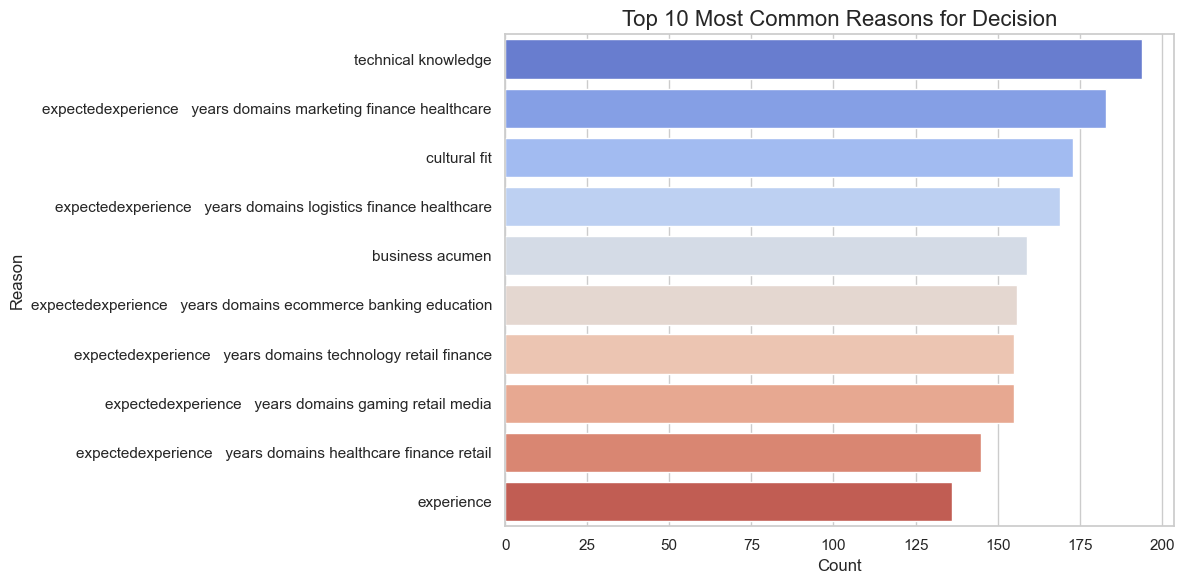

In [51]:
# Configure visualizations
sns.set(style="whitegrid")

# Plot the most common 'Reason for Decision' if the column exists
if 'Reason for decision' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Get the top 10 most common reasons
    reason_counts = combined_df['Reason for decision'].value_counts().head(10)
    
    # Create the bar plot
    sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='coolwarm')
    
    # Add plot title and axis labels
    plt.title('Top 10 Most Common Reasons for Decision', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Reason', fontsize=12)
    plt.tight_layout()
    plt.show()

In [52]:
# Check for missing values or completely empty rows
print("Number of missing values in Transcript:", combined_df['Transcript'].isnull().sum())
print("Number of missing values in Resume:", combined_df['Resume'].isnull().sum())
print("Number of missing values in Transcript:", combined_df['Reason for decision'].isnull().sum())
print("Number of missing values in Resume:", combined_df['Job Description'].isnull().sum())

Number of missing values in Transcript: 0
Number of missing values in Resume: 0
Number of missing values in Transcript: 0
Number of missing values in Resume: 0


In [53]:
# Apply cleaning to all object-type columns in the dataset
combined_df = combined_df.apply(lambda col: clean_text_column(col) if col.dtype == 'object' else col)


In [54]:
# Check for remaining unwanted characters
for col in columns_to_clean:
    if col in combined_df.columns:
        print(f"Sample cleaned data from column '{col}':")
        combined_df[col].head()


Sample cleaned data from column 'Transcript':
Sample cleaned data from column 'Resume':
Sample cleaned data from column 'Job Description':
Sample cleaned data from column 'Reason for decision':


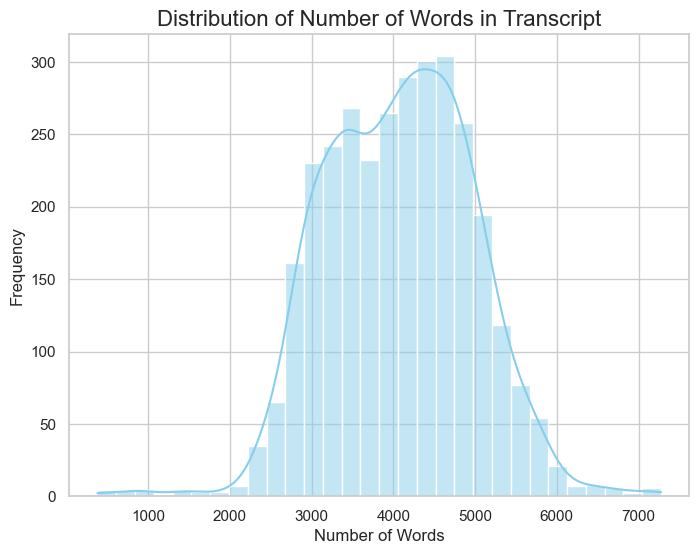

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Transcript_length'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Number of Words in Transcript", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


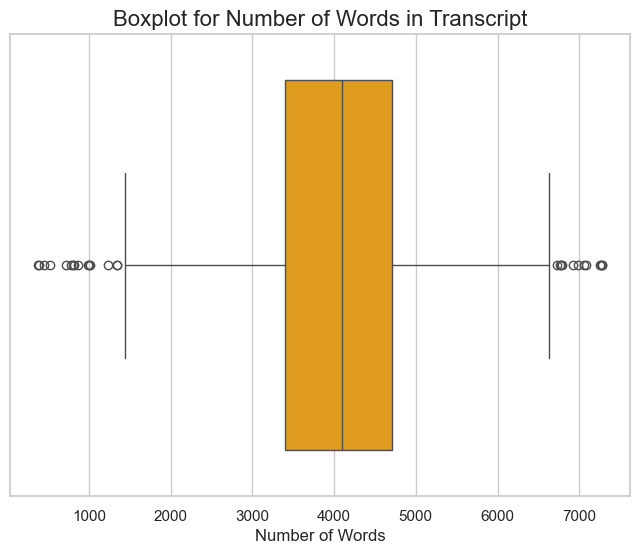

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_df['Transcript_length'], color='orange')
plt.title("Boxplot for Number of Words in Transcript", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.show()


C:\Users\uppar\AppData\Local\Temp\ipykernel_19124\425891037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='decision', palette='viridis')


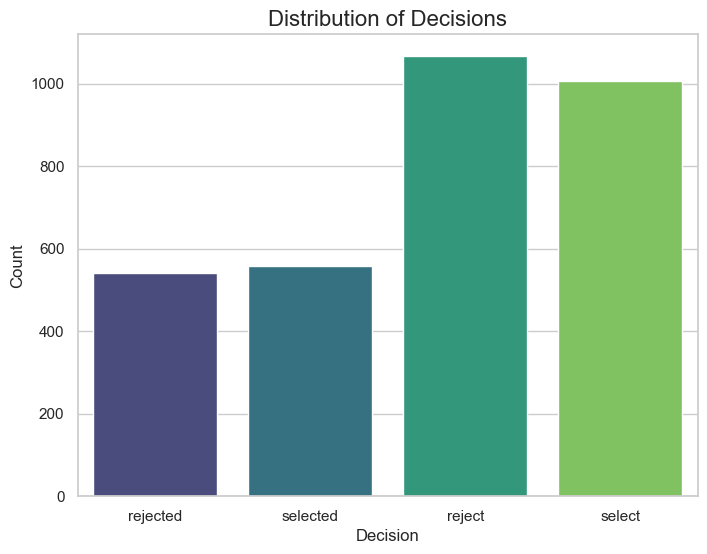

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_df, x='decision', palette='viridis')
plt.title("Distribution of Decisions", fontsize=16)
plt.xlabel("Decision", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


C:\Users\uppar\AppData\Local\Temp\ipykernel_19124\1942180684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')


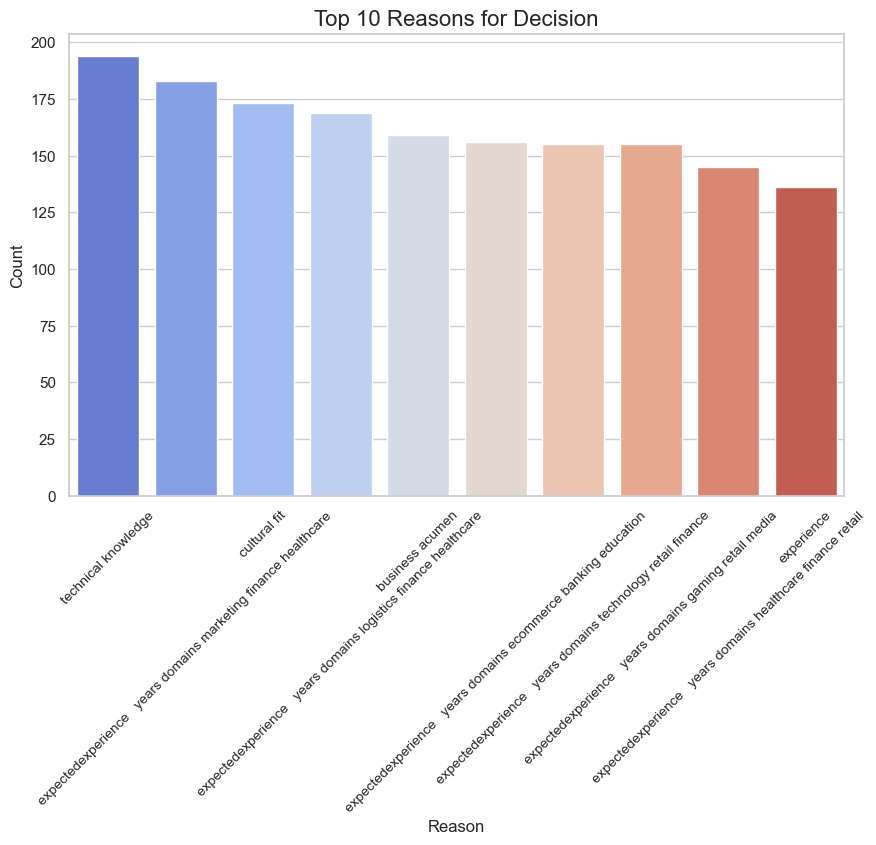

In [66]:
plt.figure(figsize=(10, 6))
reason_counts = combined_df['Reason for decision'].value_counts().head(10)
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='coolwarm')
plt.title("Top 10 Reasons for Decision", fontsize=16)
plt.xlabel("Reason", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


# Data Visualization
Point: Visualize the distribution of decisions.

Creates a bar plot for the decision column to show the counts of 'select' and 'reject' labels.
Point: Analyze common reasons for decision.

Generates a bar chart for the top 10 most common reasons for candidate decisions.
Point: Analyze word distribution in 'Transcript' column.

Plots a histogram and boxplot to display the distribution and variability of word counts in transcripts.

In [69]:
# Save the combined dataframe to a CSV file
combined_df.to_csv('combined_cleaned_dataset.csv', index=False)
print("Combined dataframe saved to 'combined_cleaned_dataset.csv'.")

Combined dataframe saved to 'combined_cleaned_dataset.csv'.


In [71]:
!pip install xgboost


In [72]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import matplotlib.pyplot as plt


# Import Necessary Libraries
Use Python libraries for machine learning and data processing:
os for file operations.
numpy and pandas for numerical and data manipulation.
sklearn modules for preprocessing, model building, and evaluation.
xgboost for gradient boosting algorithms.
matplotlib for plotting results.

In [76]:
# Define folder path
folder_path = 'recruitment_data'

# Load all Excel files
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]
dataframes = [pd.read_excel(os.path.join(folder_path, file)) for file in files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Clean text columns
def clean_text_column(column):
    if column.dtype == 'object':
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Process decision column
combined_df['decision'] = combined_df['decision'].apply(lambda x: 'select' if x in ['select', 'selected'] else 'reject')


# Define Folder Path and Load Data
Specify the folder containing recruitment data.
Load all Excel files from the folder using os and pandas.
Combine data from all files into a single DataFrame using pd.concat().

Clean Text Columns
Create a function to clean text columns:
Remove non-alphabetic characters using regex.
Convert text to lowercase and strip whitespace.
Apply the function to specific columns, e.g., Transcript, Resume, etc.


In [78]:
# Separate features and target
X = combined_df.drop(['decision', 'ID'], axis=1, errors='ignore')
y = combined_df['decision']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode target labels


# Process Decision Column

Normalize decision values:
Map all forms of "select" (e.g., "selected") to a single label, select.
Map other values to reject.

# Feature and Target Separation
Separate features (X) and target (y).
Drop unnecessary columns like ID and decision from X.
Identify:
Categorical columns for encoding.
Numeric columns for scaling.
Preprocessing Pipeline

# Use ColumnTransformer to:
Apply StandardScaler to numeric columns.
Apply OneHotEncoder to categorical columns.
Preprocess the feature set using this pipeline.
Encode Target Variable
Use LabelEncoder to convert decision labels (select, reject) into numerical values (0, 1).

In [82]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")


Train set size: (2539, 10533), Test set size: (635, 10533)


# Train-Test Split
Split data into training (80%) and testing (20%) sets using train_test_split.

Use stratification to maintain the class distribution.

# 1. Decision Tree

In [86]:
# Decision Tree with hyperparameter tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)

# Best model and evaluation
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
acc_dt = accuracy_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_prob_dt)

print("Decision Tree - Accuracy:", acc_dt)
print("Decision Tree - ROC AUC Score:", roc_dt)


Decision Tree - Accuracy: 0.6188976377952756
Decision Tree - ROC AUC Score: 0.6556871280801949


# Decision Tree Model
Perform hyperparameter tuning for max_depth and min_samples_split.

Evaluate the best model:
Calculate accuracy and ROC AUC scores.

Achieved accuracy: 61.89%; ROC AUC: 65.57%.
# How It Works:
Splits data based on feature values to create a tree structure.

Each node represents a feature condition, and leaves represent the decision (class).

# 2. Random Forest

In [90]:
# Random Forest with hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

# Best model and evaluation
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest - Accuracy:", acc_rf)
print("Random Forest - ROC AUC Score:", roc_rf)


Random Forest - Accuracy: 0.7228346456692913
Random Forest - ROC AUC Score: 0.9458195215463876


# Random Forest Model
Perform hyperparameter tuning for n_estimators, max_depth, and min_samples_split.

Evaluate the best model:
Calculate accuracy and ROC AUC scores.

Achieved accuracy: 72.28%; ROC AUC: 94.58%.
# How It Works:
Combines multiple decision trees trained on random subsets of data and features.

Aggregates the predictions (majority vote for classification).

# 3. XGBoost

In [94]:
import xgboost as xgb

# XGBoost with hyperparameter tuning
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)

# Best model and evaluation
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("XGBoost - Accuracy:", acc_xgb)
print("XGBoost - ROC AUC Score:", roc_xgb)

C:\Users\uppar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:45:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\uppar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:45:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\uppar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:45:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\uppar\anaconda3\Lib\site-packages\

XGBoost - Accuracy: 0.8062992125984252
XGBoost - ROC AUC Score: 0.9322606733495746


# XGBoost Model
Perform hyperparameter tuning for n_estimators, max_depth, and learning_rate.

Evaluate the best model:
Calculate accuracy and ROC AUC scores.
Achieved accuracy: 80.63%; ROC AUC: 93.23%.
# How It Works:
Builds sequential trees where each tree corrects the errors of the previous ones.

Optimizes performance using gradient descent.

Implements regularization to reduce overfitting.


# 4. Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Logistic Regression with hyperparameter tuning
lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

# Best model and evaluation
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression - Accuracy:", acc_lr)
print("Logistic Regression - ROC AUC Score:", roc_lr)

Logistic Regression - Accuracy: 0.8362204724409449
Logistic Regression - ROC AUC Score: 0.94386756659611


In [126]:
# Bootstrapping to estimate standard errors
n_iterations = 100
coefficients_bootstrap = []

for i in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
    bootstrap_lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_resampled, y_resampled)
    coefficients_bootstrap.append(bootstrap_lr.coef_.flatten())

# Calculate standard errors from bootstrap samples
coefficients_bootstrap = np.array(coefficients_bootstrap)
std_errors = coefficients_bootstrap.std(axis=0)

# Extract coefficients and intercept
coefficients = best_lr.coef_.flatten()
intercept = best_lr.intercept_[0]

# Calculate z-scores and p-values
z_scores = coefficients / std_errors
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed p-value

# Confidence intervals
conf_intervals = np.array([
    [coef - 1.96 * std_err, coef + 1.96 * std_err]
    for coef, std_err in zip(coefficients, std_errors)
])

# Create summary table
summary_table = pd.DataFrame({
    # 'Variable': ['Intercept'] + list(X_train.columns),
    'Coefficient': [intercept] + coefficients.tolist(),
    'Std. Error': [np.nan] + std_errors.tolist(),
    'z': [np.nan] + z_scores.tolist(),
    'P>|z|': [np.nan] + p_values.tolist(),
    '[0.025': [np.nan] + conf_intervals[:, 0].tolist(),
    '0.975]': [np.nan] + conf_intervals[:, 1].tolist()
})

# Printing summary table
print(summary_table)


       Coefficient  Std. Error         z     P>|z|    [0.025    0.975]
0        -0.394080         NaN       NaN       NaN       NaN       NaN
1         0.000000    0.000000       NaN       NaN  0.000000  0.000000
2        -0.049861    0.026732 -1.865170  0.062158 -0.102256  0.002535
3        -0.050024    0.025262 -1.980176  0.047684 -0.099539 -0.000510
4         0.000000    0.000000       NaN       NaN  0.000000  0.000000
...            ...         ...       ...       ...       ...       ...
10529     0.000000    0.000000       NaN       NaN  0.000000  0.000000
10530    -0.577242    0.166358 -3.469876  0.000521 -0.903304 -0.251180
10531     0.686904    0.145712  4.714107  0.000002  0.401307  0.972500
10532     0.611749    0.144447  4.235117  0.000023  0.328633  0.894864
10533     0.000000    0.000000       NaN       NaN  0.000000  0.000000

[10534 rows x 6 columns]


C:\Users\uppar\AppData\Local\Temp\ipykernel_19124\1496226164.py:19: RuntimeWarning: invalid value encountered in divide
  z_scores = coefficients / std_errors


# Logistic Regression Model
Perform hyperparameter tuning using GridSearchCV for C values.

Evaluate the best model:
Calculate accuracy and ROC AUC scores.

Achieved accuracy: 83.62%; ROC AUC: 94.39%.
# How It Works:
Predicts the probability of a class using the logistic function (sigmoid curve).

Output probabilities are converted into binary classifications based on a threshold (e.g., 0.5).

In [101]:
# Summarize results
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_xgb],
    'ROC AUC': [roc_lr, roc_dt, roc_rf, roc_xgb]
}

results_df = pd.DataFrame(results)
print(results_df)

# Identify the best model
best_model_index = results_df['ROC AUC'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Model']
print("Best Model:", best_model_name)


                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.836220  0.943868
1        Decision Tree  0.618898  0.655687
2        Random Forest  0.722835  0.945820
3              XGBoost  0.806299  0.932261
Best Model: Random Forest


# Results Summary
Compile results into a DataFrame with accuracy and ROC AUC for all models.

Identify the best model based on ROC AUC:
Best Model: Random Forest (Accuracy: 72.28%, ROC AUC: 94.58%).

Model: Logistic Regression
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       343
           1       0.84      0.80      0.82       292

    accuracy                           0.84       635
   macro avg       0.84      0.84      0.84       635
weighted avg       0.84      0.84      0.84       635



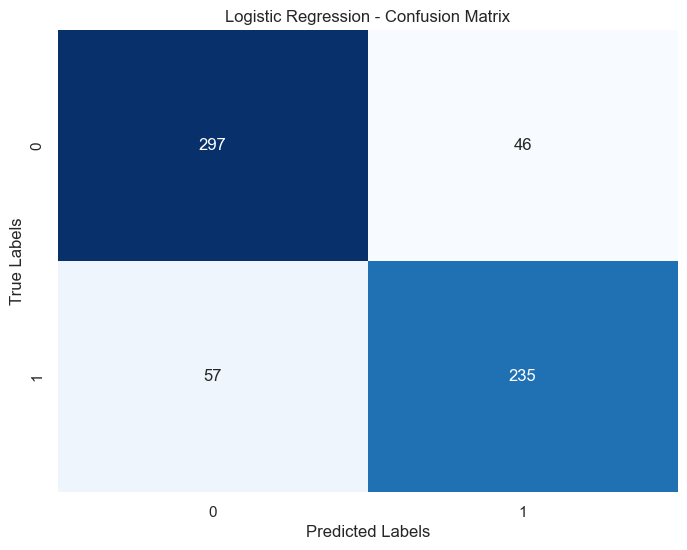

Model: Decision Tree
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       343
           1       0.80      0.79      0.80       292

    accuracy                           0.81       635
   macro avg       0.81      0.81      0.81       635
weighted avg       0.81      0.81      0.81       635



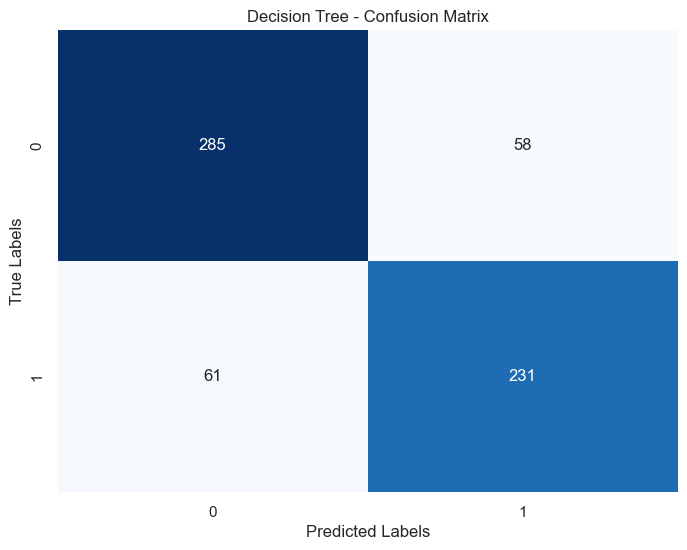

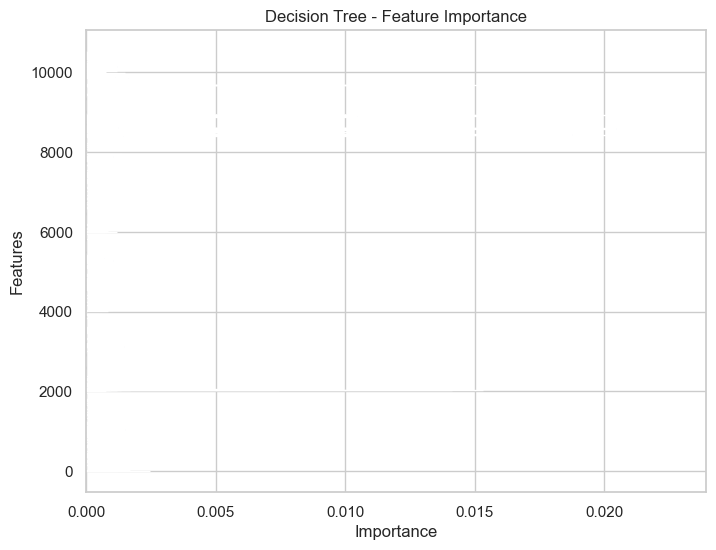

Model: XGBoost
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       343
           1       0.93      0.68      0.79       292

    accuracy                           0.83       635
   macro avg       0.85      0.82      0.82       635
weighted avg       0.85      0.83      0.83       635



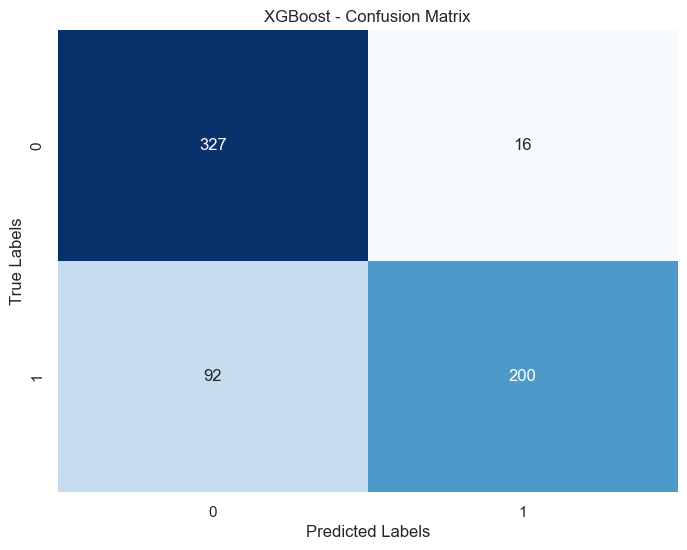

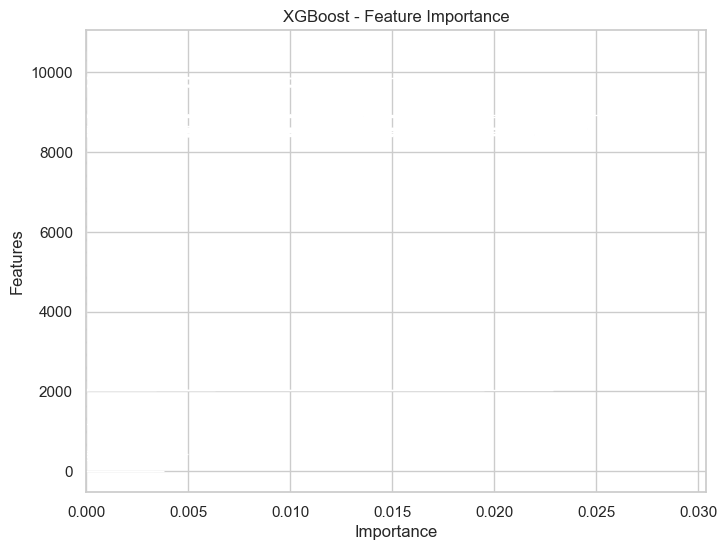

Model: Random Forest
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       343
           1       0.94      0.67      0.78       292

    accuracy                           0.83       635
   macro avg       0.86      0.82      0.82       635
weighted avg       0.85      0.83      0.83       635



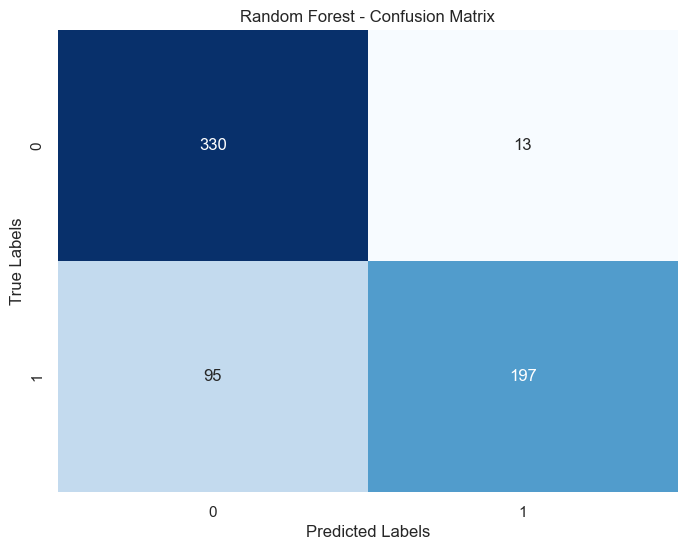

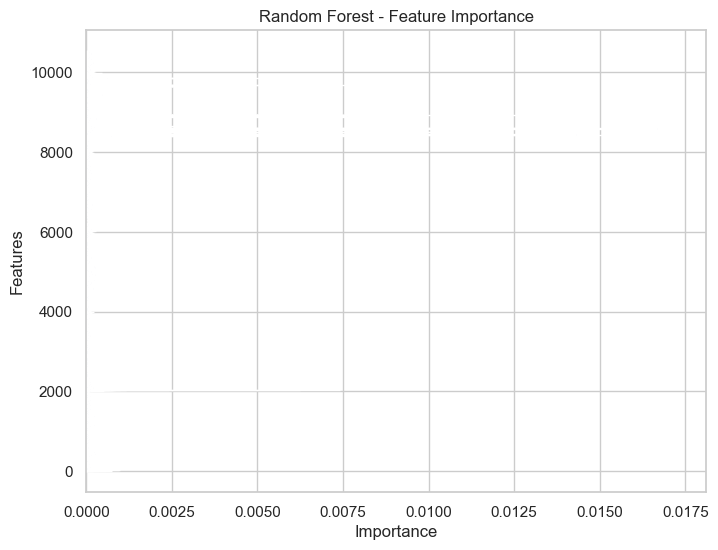

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Define a function to plot results for each model
def plot_model_results(model_name, model, X_train, X_test, y_train, y_test):
    # Predict
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Plot Feature Importance if the model supports it
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        if feature_importances is not None and len(feature_importances) > 0:
            # Plot feature importance
            plt.figure(figsize=(8, 6))
            plt.barh(range(len(feature_importances)), feature_importances)
            plt.title(f"{model_name} - Feature Importance")
            plt.xlabel("Importance")
            plt.ylabel("Features")
            plt.show()

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Train and plot for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    plot_model_results(model_name, model, X_train, X_test, y_train, y_test)


# Plotting Model Results
Create a function to:
Predict and evaluate using metrics like accuracy and classification report.

Visualize confusion matrix using a heatmap.
Plot feature importance (for models that support it).
Apply the function to all trained models.